In [1]:
'''
    （2）	统计7月份每天每个司机每趟行程里发生的每类报警类型的数量
    （3）	对每个司机每趟行程发生每类报警数量进行分布情况的分析
    （4）	对每个司机每趟行程发生 每类报警数量/行驶时长 进行分布情况的分析行驶时间与发生警告的关系
'''

import math
import pandas as pd
from matplotlib import pyplot as plt

class Event_type(object):
    class Struct(object):
        def __init__(self, id, name, color):
            self.name = name
            self.id = id
            self.color = color

    def make_struct(self, id, name, color):
        return self.Struct(id, name, color)


risk_df = pd.read_csv('C:\\Users\\zhengqiushi\\Desktop\\hik\\21-08-13\\数据\\t_risk_accessment_result' + '.csv') # pd.read_sql_query(sql, db_engine)
risk_type_df = pd.read_csv('C:\\Users\\zhengqiushi\\Desktop\\hik\\21-08-13\\数据\\t_alarm_basic_config' + '.csv')

event_class = Event_type()
event_id = [
    # event_class.make_struct('132355', 'lane departure(L) W', '#00CED1'),
]

for i, r in risk_type_df.iterrows():
    event_id.append(event_class.make_struct(r['event_type'], r['\"name\"'], "..."))


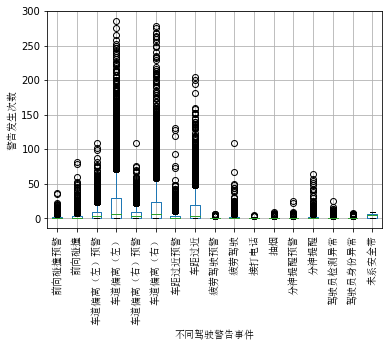

C:\Users\zhengqiushi\AppData\Local\Temp/ipykernel_18544/2720365826.py:35: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df_final.describe().T.to_excel('C:\\Users\\zhengqiushi\\Desktop\\hik\\21-08-13\\数据\\out_3.xls')


In [2]:

from matplotlib.font_manager import FontProperties 

font = FontProperties(fname=r"C:\\Windows\\Fonts\\simsun.ttc", size=10) 

# 遍历每种alarm event
data = {}
for index, cur_id in  enumerate(event_id):
    # 筛选当前种类
    condition_q = "event_type=={0}".format(cur_id.id)
    cur_alarm_df = risk_df.query(condition_q) 
    # 筛出异常值
    cur_alarm_df = cur_alarm_df[cur_alarm_df['event_num'] < 300]
    # 排个序
    cur_alarm_df.sort_values('driver_time', ascending=True)

    df_final = pd.DataFrame()
    # 添加新的列
    new_column = pd.Series(cur_alarm_df['event_num'].values)
    if len(new_column.values) == 0:
        continue
    data[str(cur_id.name)] = new_column.values

df_final = pd.DataFrame.from_dict(data, orient='index')
df_final = df_final.T

# 解决标注乱码的问题
ax = df_final.boxplot(rot='90')
for label in ax.get_xticklabels() : 
    label.set_fontproperties(font) 

plt.ylabel("警告发生次数", font = font)
plt.xlabel("不同驾驶警告事件", font = font)
plt.show()

df_final.describe().T.to_excel('C:\\Users\\zhengqiushi\\Desktop\\hik\\21-08-13\\数据\\task3_describe.xls')
    # break

In [ ]:

from matplotlib.font_manager import FontProperties 

font = FontProperties(fname=r"C:\\Windows\\Fonts\\simsun.ttc", size=10) 


# 遍历每种alarm event
data = {}
for index, cur_id in  enumerate(event_id):
    # 筛选当前种类
    condition_q = "event_type=={0}".format(cur_id.id)
    cur_alarm_df = risk_df.query(condition_q) 
    # 偏离太多的被滤除
    cur_alarm_df = cur_alarm_df[cur_alarm_df['\"percent\"'] < 100]

    cur_alarm_df.sort_values('driver_time', ascending=True)

    df_final = pd.DataFrame()
    
    # 添加新的列
    new_column = pd.Series(cur_alarm_df['\"percent\"'].values)
    
    if len(new_column.values) == 0:
        continue
    
    data[str(cur_id.name)] = new_column.values


df_final = pd.DataFrame.from_dict(data, orient='index')
# print(cur_id.id)
df_final = df_final.T
# df_final.plot.box(rot='45')


ax = df_final.boxplot(rot='90')
for label in ax.get_xticklabels() : 
    label.set_fontproperties(font) 

plt.ylabel("警告发生次数/行驶时间", font = font)
plt.xlabel("不同驾驶警告事件", font = font)
plt.show()


df_final.describe().T.to_excel('C:\\Users\\zhengqiushi\\Desktop\\hik\\21-08-13\\数据\\task4_describe.xls')
